In [1]:
#!/usr/bin/env python
# # -*- coding: utf-8 -*-
#!/usr/bin/env python
#!pip install tensorflow==1.15

import numpy as np
import matplotlib.pyplot as plt
import pickle
import glob, os, inspect
import argparse
import time
import seaborn as sns
# import matplotlib
# matplotlib.use("Qt5Agg")
# #matplotlib.use('Agg')
# from mpl_toolkits.mplot3d import axes3d
# import matplotlib.pyplot as plt
import pandas as pd
import sys,inspect
sys.path.append("C:\\Users\\Vinamr J\\Documents\\qic\\qrc\\hqr\\hqr-master\\chaos\\Postprocess")
sys.path.append("C:\\Users\\Vinamr J\\Documents\\qic\\qrc\\hqr\\hqr-master\\chaos\\Methods\\Models\\Utils")

import utils  # for utils.py
from utils import *
import global_utils  # for global_utils.py

# import utils
# from utils import *
# import sys
# sys.path.append('../Methods/Models/Utils')
# import global_utils

In [2]:
sysname, tidx = "SST", 2
file_path = os.path.abspath("HQRC_analysis.ipynb")
current_directory = os.path.dirname(file_path)
mid_directory = os.path.dirname(current_directory)
parent_directory = os.path.dirname(mid_directory)

print("Current Directory:", current_directory)
print("Parent Directory:", parent_directory)

#current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
results_dir = os.path.join(os.path.dirname(mid_directory), "Results")  # Use os.path.join for path concatenation
print(results_dir)

eval_path = os.path.join(results_dir, sysname, 'Evaluation_Data')
print(eval_path)

model_path = os.path.join(results_dir, sysname, 'Trained_Models')
print(model_path)

fig_path = os.path.join(results_dir, sysname, 'Eval_Figures')
if not os.path.isdir(fig_path):
    os.makedirs(fig_path)  # Use os.makedirs to create parent directories if needed
print(fig_path)

Current Directory: c:\Users\Vinamr J\Documents\qic\qrc\hqr\hqr-master\chaos\Data\SST
Parent Directory: c:\Users\Vinamr J\Documents\qic\qrc\hqr\hqr-master\chaos
c:\Users\Vinamr J\Documents\qic\qrc\hqr\hqr-master\chaos\Results
c:\Users\Vinamr J\Documents\qic\qrc\hqr\hqr-master\chaos\Results\SST\Evaluation_Data
c:\Users\Vinamr J\Documents\qic\qrc\hqr\hqr-master\chaos\Results\SST\Trained_Models
c:\Users\Vinamr J\Documents\qic\qrc\hqr\hqr-master\chaos\Results\SST\Eval_Figures


In [3]:
models = []
samples = []
V_values = [10,1, 5]
alpha_values = [0.5]
beta_values = [1e-7]
nqrc = [20, 10]
for V in V_values:
    for alpha in alpha_values:
        for beta in beta_values:
            for n_qrc in nqrc:
                string1 = f"hqrc_pinv-RDIM_{10}-N_used_427-DL_40-Nqr_{n_qrc}-A_{alpha}-J_2.0-fJ_1-V_{V}-NL_0-IPL_300-IUL_0-REG_{beta}-AU_0-NICS_3"
                string2 = f"HQRC-V={V}-alpha={alpha}-beta={beta}-NQRC-{n_qrc}"
                models.append([os.path.join(eval_path,string1),string2])
                samples.append(string2)
title = "Sea Surface Temperatures"

In [3]:
# models = [[os.path.join(eval_path, "hqrc_pinv-RDIM_5-N_used_427-DL_40-Nqr_5-A_0.9-J_2.0-fJ_1-V_10-NL_0-IPL_20-IUL_0-REG_1e-07-AU_0-NICS_3"),"HQR-5,V-10,DL=40,IPL=20,n_tests=3"],
#           [os.path.join(eval_path, "hqrc_pinv-RDIM_5-N_used_427-DL_8-Nqr_5-A_0.9-J_2.0-fJ_1-V_10-NL_0-IPL_8-IUL_0-REG_1e-07-AU_0-NICS_1"),"HQR-5,V-10,DL=8,IPL=8,n_tests=1"],
#           [os.path.join(eval_path, "hqrc_pinv-RDIM_5-N_used_427-DL_40-Nqr_5-A_0.9-J_2.0-fJ_1-V_10-NL_0-IPL_300-IUL_0-REG_1e-07-AU_0-NICS_1"),"HQR-5,V-10,DL=40,IPL=300,n_tests=1"]]
# samples = ["HQR-5,V-10,DL=40,IPL=20,n_tests=3","HQR-5,V-10,DL=8,IPL=8,n_tests=1","HQR-5,V-10,DL=40,IPL=300,n_tests=1"]
# title = "Sea Surface Temperatures"

In [4]:
rmse_dict = dict()
targets = dict()
outputs = dict()
targets_train = dict()
outputs_train = dict()
sp_outputs = dict()
sp_targets = dict()
Wouts = dict()
coeffs = dict()
rmnse_avg_train_dict = dict()
rmnse_avg_test_dict = dict()
for i in range(len(models)):
    rfolder, label = models[i][0], models[i][1]
    fname = os.path.join(rfolder, 'results.pickle')
    if os.path.isfile(fname):
        with open(fname, 'rb') as rfile:
            try:
                rs = pickle.load(rfile)
            except:
                continue
            #print(rs.keys())
            qs = QResults()
            qs.rmnse_avg_test = rs['rmnse_avg_TEST']
            qs.rmnse_avg_train = rs['rmnse_avg_TRAIN']
            qs.n_pred_005_avg_test = rs['num_accurate_pred_005_avg_TEST']
            qs.n_pred_005_avg_train = rs['num_accurate_pred_005_avg_TRAIN']
            qs.n_pred_050_avg_test = rs['num_accurate_pred_050_avg_TEST']
            qs.n_pred_050_avg_train = rs['num_accurate_pred_050_avg_TRAIN']
            qs.model_name = rs['model_name']
            #if qs.rmnse_avg_test != np.inf and qs.rmnse_avg_train != np.inf:
                #print(rs.keys())
            #print(qs.model_name)
            #print('train={}, test={}'.format(qs.rmnse_avg_train, qs.rmnse_avg_test))
            #qs.info()
            rmnse_avg_train_dict[label] = rs['rmnse_avg_TRAIN']
            rmnse_avg_test_dict[label] = rs['rmnse_avg_TEST']
            pred_test = rs['predictions_all_TEST']
            truth_test = rs['truths_all_TEST']
            pred_train = rs['predictions_all_TRAIN']
            truth_train =rs['truths_all_TRAIN']
            print(pred_test.shape)
            M = len(pred_test)
            print('{} Number of test'.format(qs.model_name), M)
            rmsels = []
            for j in range(M):
                    rmsels.append(calNRMSE(pred_test[j], truth_test[j]))

            rmse_dict[label] = np.mean(np.array(rmsels), axis=0)
            print(rmse_dict[label].shape)


            targets[label] = truth_test[0] #0th test 
            outputs[label] = pred_test[0]

            targets_train[label] = truth_train[0] #0th test 
            outputs_train[label] = pred_train[0]
            # For frequency
            sp_outputs[label] = rs['sp_pred_TEST']
            sp_targets[label] = rs['sp_true_TEST']
    else:
        print('Not found {}'.format(fname))
    # if trained_models is not None:
    #     rfolder, label = trained_models[i][0], trained_models[i][1]
    #     fname = os.path.join(rfolder, 'data.pickle')
    #     if os.path.isfile(fname):
    #         print('File existed: ', fname)
    #         with open(fname, 'rb') as rfile:
    #             #try:
    #             rs = pickle.load(rfile)
    #             #except:
    #             #    continue
    #             print(rs.keys())
    #             coeffs[label] = np.array(rs['coeffs'])
    #             Wouts[label]  = rs['W_out'][:-1].reshape((coeffs[label].shape[0], -1))
    #             print(Wouts[label].shape, coeffs[label].shape)
    #     else:
    #         print('Not found saved model {}'.format(fname))

(3, 300, 10)
hqrc_pinv-RDIM_10-N_used_427-DL_40-Nqr_20-A_0.5-J_2.0-fJ_1-V_10-NL_0-IPL_300-IUL_0-REG_1e-07-AU_0-NICS_3 Number of test 3
(300,)
(3, 300, 10)
hqrc_pinv-RDIM_10-N_used_427-DL_40-Nqr_10-A_0.5-J_2.0-fJ_1-V_10-NL_0-IPL_300-IUL_0-REG_1e-07-AU_0-NICS_3 Number of test 3
(300,)
(3, 300, 10)
hqrc_pinv-RDIM_10-N_used_427-DL_40-Nqr_20-A_0.5-J_2.0-fJ_1-V_1-NL_0-IPL_300-IUL_0-REG_1e-07-AU_0-NICS_3 Number of test 3
(300,)
(3, 300, 10)
hqrc_pinv-RDIM_10-N_used_427-DL_40-Nqr_10-A_0.5-J_2.0-fJ_1-V_1-NL_0-IPL_300-IUL_0-REG_1e-07-AU_0-NICS_3 Number of test 3
(300,)
(3, 300, 10)
hqrc_pinv-RDIM_10-N_used_427-DL_40-Nqr_20-A_0.5-J_2.0-fJ_1-V_5-NL_0-IPL_300-IUL_0-REG_1e-07-AU_0-NICS_3 Number of test 3
(300,)
(3, 300, 10)
hqrc_pinv-RDIM_10-N_used_427-DL_40-Nqr_10-A_0.5-J_2.0-fJ_1-V_5-NL_0-IPL_300-IUL_0-REG_1e-07-AU_0-NICS_3 Number of test 3
(300,)


In [5]:
#Manually calculated ignore
model_test_error = []
test_avg_error = []
for label in samples:
    model_test_error.append([label,np.mean(rmse_dict[label])])
    test_avg_error.append(np.mean(rmse_dict[label]))
print(model_test_error)
print("Test Average error = ",np.mean(test_avg_error))

[['HQRC-V=10-alpha=0.5-beta=1e-07-NQRC-20', 2.630828468242583], ['HQRC-V=10-alpha=0.5-beta=1e-07-NQRC-10', 2.975349377543599], ['HQRC-V=1-alpha=0.5-beta=1e-07-NQRC-20', 2.597773117826708], ['HQRC-V=1-alpha=0.5-beta=1e-07-NQRC-10', 1.8871244658196231], ['HQRC-V=5-alpha=0.5-beta=1e-07-NQRC-20', 2.5672025596860673], ['HQRC-V=5-alpha=0.5-beta=1e-07-NQRC-10', 2.6172201525687933]]
Test Average error =  2.5459163569478958


In [6]:
print(rmnse_avg_train_dict)
print(rmnse_avg_test_dict)
error_array_test = []
error_array_train = []
for label in samples:
    error_array_train.append(rmnse_avg_train_dict[label])
    error_array_test.append(rmnse_avg_test_dict[label])
print("Train average error for HQRC =", np.mean(error_array_train))
print("Test average error for HQRC =", np.mean(error_array_test))

{'HQRC-V=10-alpha=0.5-beta=1e-07-NQRC-20': 1.8559933274388178, 'HQRC-V=10-alpha=0.5-beta=1e-07-NQRC-10': 1.6086772033222583, 'HQRC-V=1-alpha=0.5-beta=1e-07-NQRC-20': 1.8607620544001142, 'HQRC-V=1-alpha=0.5-beta=1e-07-NQRC-10': 1.2401750975539567, 'HQRC-V=5-alpha=0.5-beta=1e-07-NQRC-20': 1.5938925234253627, 'HQRC-V=5-alpha=0.5-beta=1e-07-NQRC-10': 1.5721463484793166}
{'HQRC-V=10-alpha=0.5-beta=1e-07-NQRC-20': 1.9031245075637153, 'HQRC-V=10-alpha=0.5-beta=1e-07-NQRC-10': 2.080374696544605, 'HQRC-V=1-alpha=0.5-beta=1e-07-NQRC-20': 1.8890335930923576, 'HQRC-V=1-alpha=0.5-beta=1e-07-NQRC-10': 1.4331104171896962, 'HQRC-V=5-alpha=0.5-beta=1e-07-NQRC-20': 1.8180277855944955, 'HQRC-V=5-alpha=0.5-beta=1e-07-NQRC-10': 1.8556295720070066}
Train average error for HQRC = 1.6219410924366375
Test average error for HQRC = 1.829883428665313


In [7]:
#Sort the dictionary by its values
sorted_rmnse_train = sorted(rmnse_avg_train_dict.items(), key=lambda item: item[1])

#Extract the top 5 keys with the lowest values
#top_5_models_train = [key for key, value in sorted_rmnse_train[:5]]
top_5_models_train = dict(sorted_rmnse_train[:5])
print("Top 5 models with the lowest RMNSE values for training data:", top_5_models_train)

Top 5 models with the lowest RMNSE values for training data: {'HQRC-V=1-alpha=0.5-beta=1e-07-NQRC-10': 1.2401750975539567, 'HQRC-V=5-alpha=0.5-beta=1e-07-NQRC-10': 1.5721463484793166, 'HQRC-V=5-alpha=0.5-beta=1e-07-NQRC-20': 1.5938925234253627, 'HQRC-V=10-alpha=0.5-beta=1e-07-NQRC-10': 1.6086772033222583, 'HQRC-V=10-alpha=0.5-beta=1e-07-NQRC-20': 1.8559933274388178}


In [8]:
# Step 1: Sort the dictionary by its values
sorted_rmnse_test = sorted(rmnse_avg_test_dict.items(), key=lambda item: item[1])

# Step 2: Extract the top 5 keys with the lowest values
#top_5_models_train = [key for key, value in sorted_rmnse_train[:5]]
top_5_models_test = dict(sorted_rmnse_test[:5])
print("Top 5 models with the lowest RMNSE values for test data:", top_5_models_test)

Top 5 models with the lowest RMNSE values for test data: {'HQRC-V=1-alpha=0.5-beta=1e-07-NQRC-10': 1.4331104171896962, 'HQRC-V=5-alpha=0.5-beta=1e-07-NQRC-20': 1.8180277855944955, 'HQRC-V=5-alpha=0.5-beta=1e-07-NQRC-10': 1.8556295720070066, 'HQRC-V=1-alpha=0.5-beta=1e-07-NQRC-20': 1.8890335930923576, 'HQRC-V=10-alpha=0.5-beta=1e-07-NQRC-20': 1.9031245075637153}


In [9]:
predictions = []
truths = []
temp = dict()
temp[list(top_5_models_train.keys())[0]]=-1
for keys in temp:
    predictions.append(outputs_train[keys])
    truths.append(targets_train[keys])
mean_train_predictions = np.mean(predictions, axis=0)
std_train_predictions = np.std(predictions, axis=0)
print("Mean predictions shape:", mean_train_predictions.shape)
print("Standard deviation shape:", std_train_predictions.shape)
print("Mean predictions:\n", mean_train_predictions)
print("Standard deviation:\n", std_train_predictions)
mean_train_truths = np.mean(truths, axis=0)
std_train_truths = np.std(truths, axis=0)
# print("Mean predictions shape:", mean_truths.shape)
# print("Standard deviation shape:", std_truths.shape)
# print("Mean predictions:\n", mean_truths)
# print("Standard deviation:\n", std_truths)

Mean predictions shape: (300, 10)
Standard deviation shape: (300, 10)
Mean predictions:
 [[-362.66022306  -69.38679439   49.87908578 ...   25.50732712
    27.96829079  -33.74975084]
 [-377.56762813  -67.76744294   54.79382431 ...   16.57275229
    42.27610132  -19.05390538]
 [-391.94844872  -60.58538031   59.96941326 ...   10.90374691
    52.13545946   -6.58442612]
 ...
 [ 191.67082854  102.87178135   24.00781011 ...  -66.16629028
    71.83522797    0.70038907]
 [ 192.38135078  102.1754073    23.70136303 ...  -66.16629028
    71.83522797   -0.65484676]
 [ 191.79709591  101.19368249   23.57618702 ...  -66.16629028
    71.83522797   -2.40082115]]
Standard deviation:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


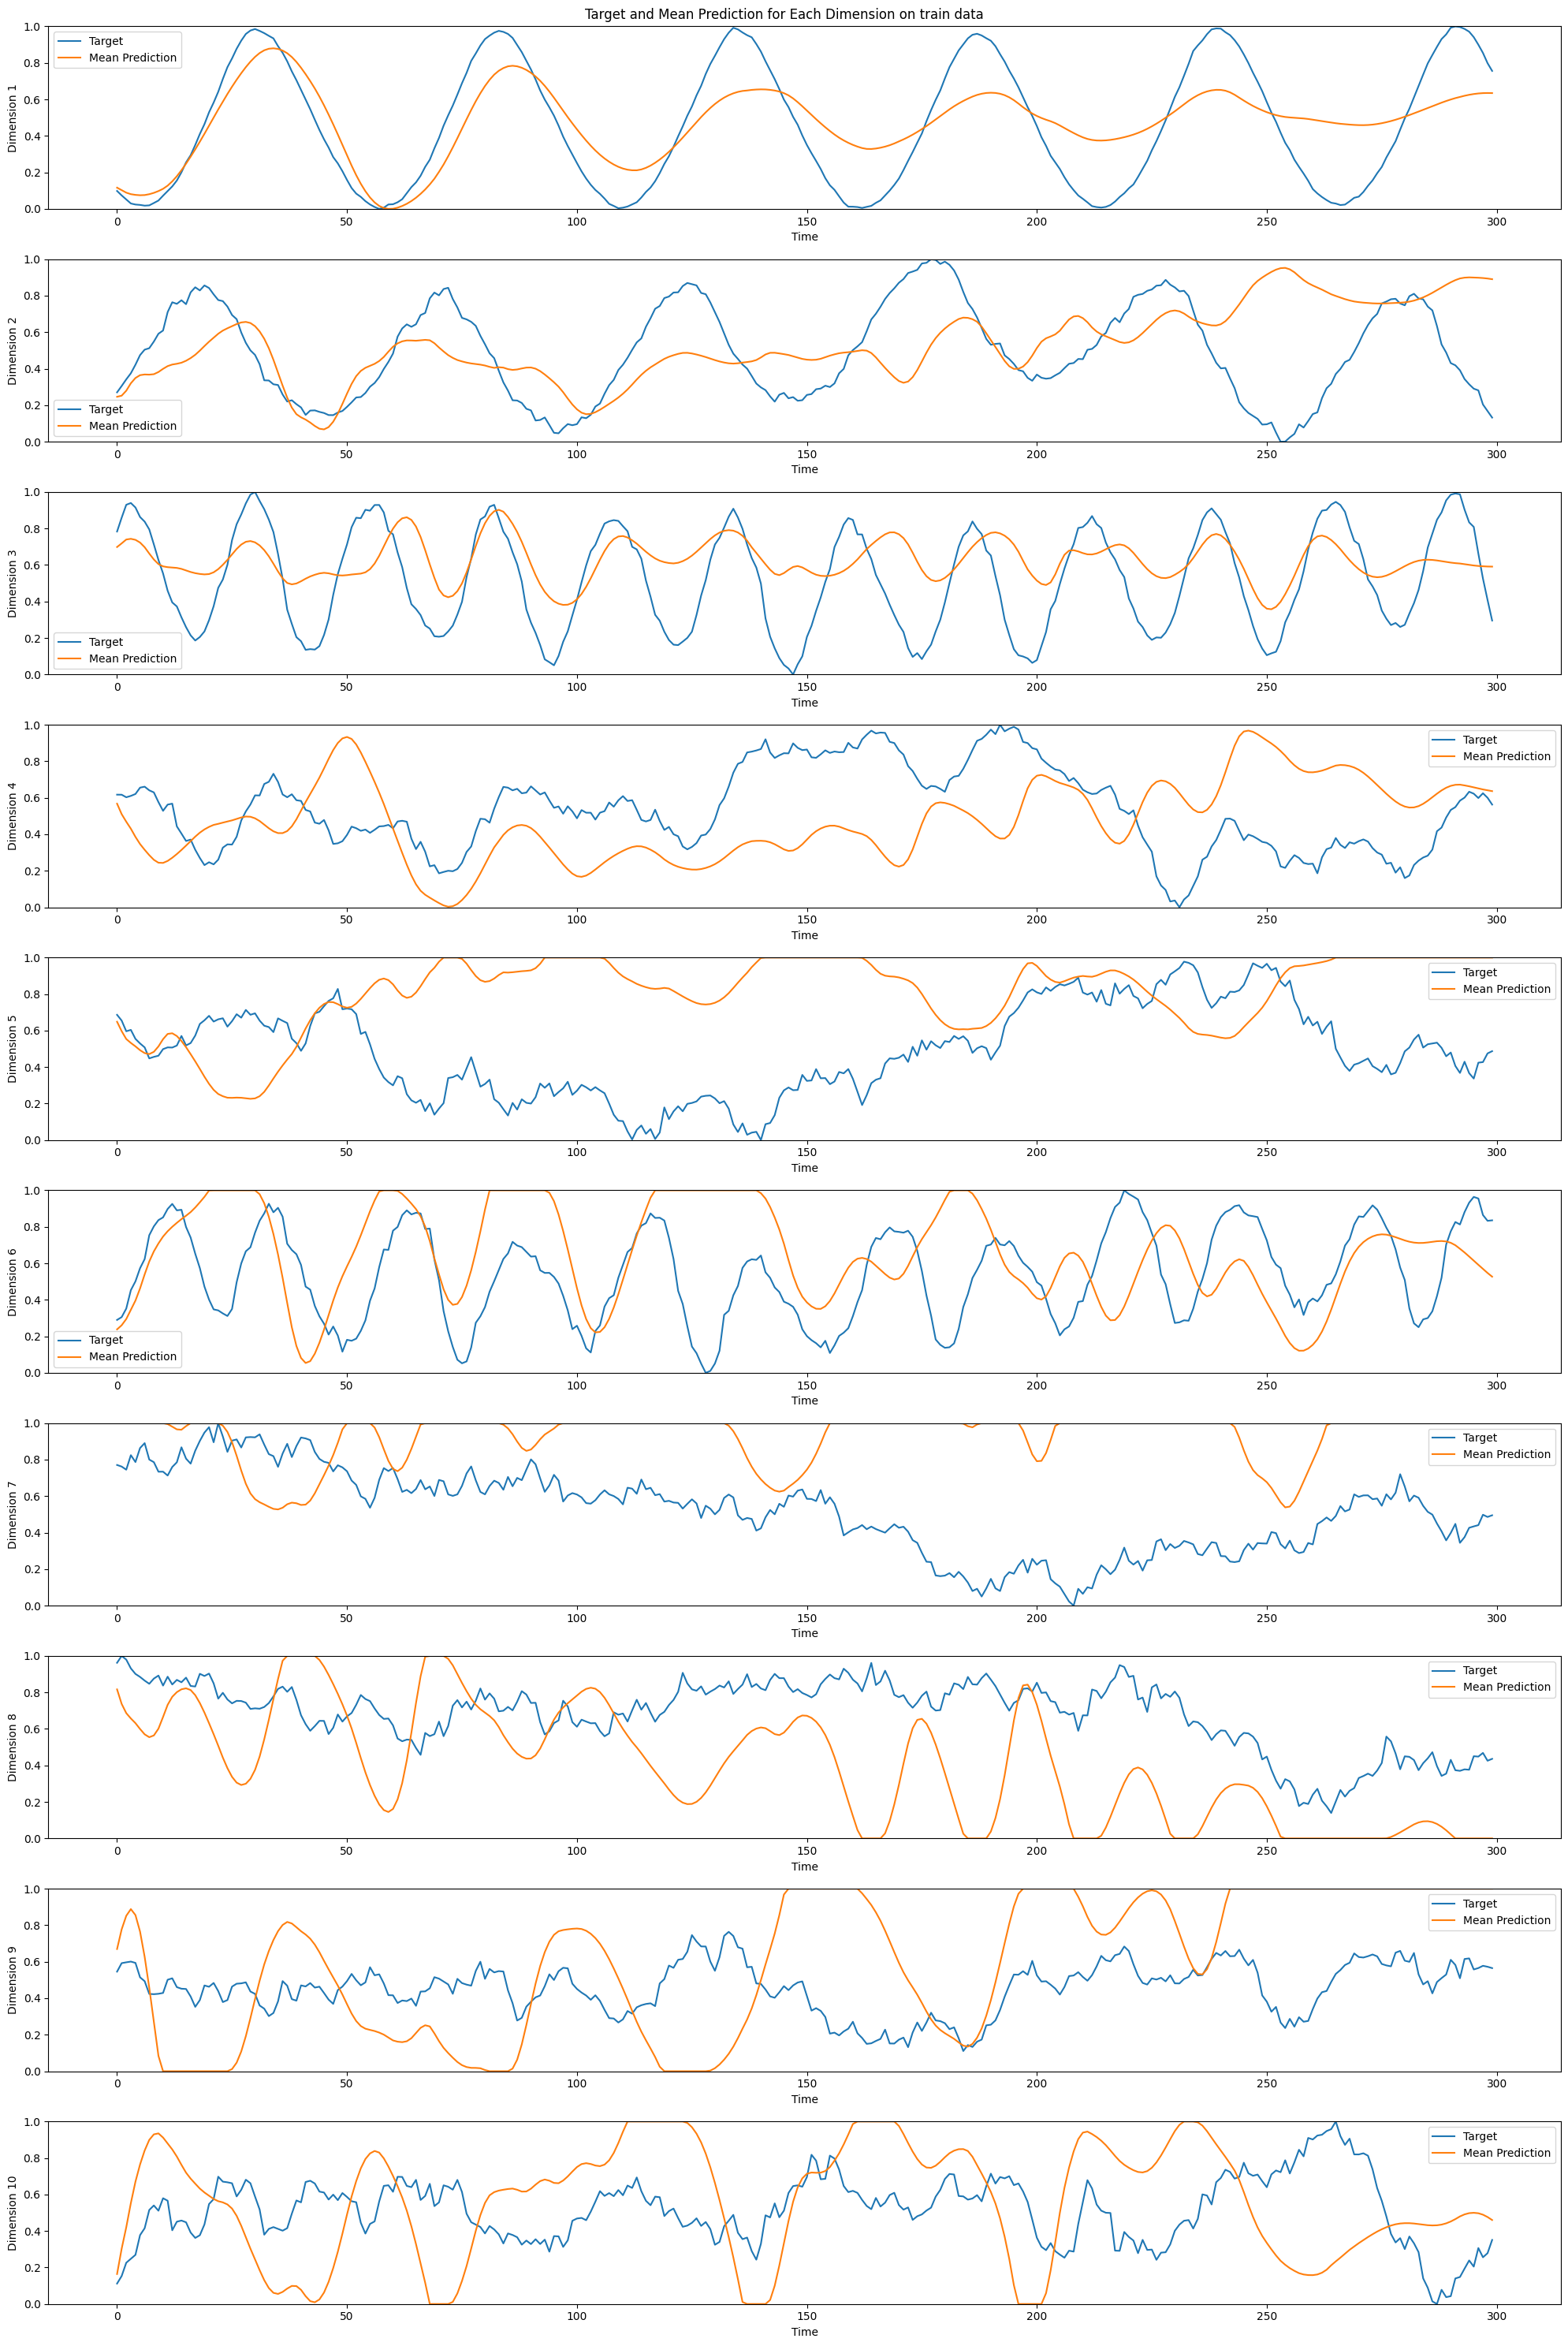

In [14]:
num_dimensions = mean_train_truths.shape[1]
# Create subplots
fig, axs = plt.subplots(num_dimensions, 1, figsize=(20, 30))

# Iterate over each dimension
for dim in range(num_dimensions):
    # Extract arrays for the current dimension
    target_dim = mean_train_truths[:, dim]
    out_dim = mean_train_predictions[:, dim]
    std_dim = std_train_predictions[:, dim]

    # Calculate min and max values across all arrays for current dimension
    data_min = min(np.min(target_dim), np.min(out_dim - std_dim))
    data_max = max(np.max(target_dim), np.max(out_dim + std_dim))

    # Normalize arrays to [0, 1] range
    target_dim = (target_dim - data_min) / (data_max - data_min)
    out_dim = (out_dim - data_min) / (data_max - data_min)
    std_dim = std_dim / (data_max - data_min)  # std deviation is normalized accordingly

    # Plot target and output arrays
    axs[dim].plot(target_dim, label='Target')
    axs[dim].plot(out_dim, label='Mean Prediction')
    #axs[dim].fill_between(range(len(out_dim)), out_dim - std_dim, out_dim + std_dim, alpha=0.2, label=r'$\sigma$')
    ####no std
    # Set y-axis limits to [0, 1]
    axs[dim].set_ylim(0, 1)

    # Add labels and legend
    axs[dim].set_xlabel('Time')
    axs[dim].set_ylabel(f'Dimension {dim + 1}')
    axs[dim].legend()

# Add title
plt.suptitle('Target and Mean Prediction for Each Dimension on train data',y=0.99)
plt.subplots_adjust(hspace=0.5, top=0.85)
# Adjust layout
plt.tight_layout()

# Plot frequency
plt.show()

In [15]:
predictions = []
truths = []
temp = dict()
temp[list(top_5_models_train.keys())[0]]=-1
for keys in temp:
    predictions.append(outputs[keys])
    truths.append(targets[keys])
mean_test_predictions = np.mean(predictions, axis=0)
std_test_predictions = np.std(predictions, axis=0)
print("Mean predictions shape:", mean_test_predictions.shape)
print("Standard deviation shape:", std_test_predictions.shape)
print("Mean predictions:\n", mean_test_predictions)
print("Standard deviation:\n", std_test_predictions)
mean_test_truths = np.mean(truths, axis=0)
std_test_truths = np.std(truths, axis=0)
# print("Mean predictions shape:", mean_truths.shape)
# print("Standard deviation shape:", std_truths.shape)
# print("Mean predictions:\n", mean_truths)
# print("Standard deviation:\n", std_truths)

Mean predictions shape: (300, 10)
Standard deviation shape: (300, 10)
Mean predictions:
 [[425.19593114 -29.26013608  32.35615003 ...  -3.95018473  48.38706748
    5.92696491]
 [386.46593797 -34.58474049  15.80879983 ...   1.32949808  68.96393724
    3.20076325]
 [341.84621086 -41.16308599  -1.75297666 ...   5.67960589  71.83522797
   -1.74840328]
 ...
 [-54.3903596   12.05234212  29.94989415 ... -51.38847988  66.08173836
    3.30300654]
 [-29.78555524  20.27459913  29.99766513 ... -57.6928028   58.58429581
   11.17513553]
 [ -3.8081328   25.43554273  30.10176636 ... -63.92589179  47.86131052
   17.95779287]]
Standard deviation:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


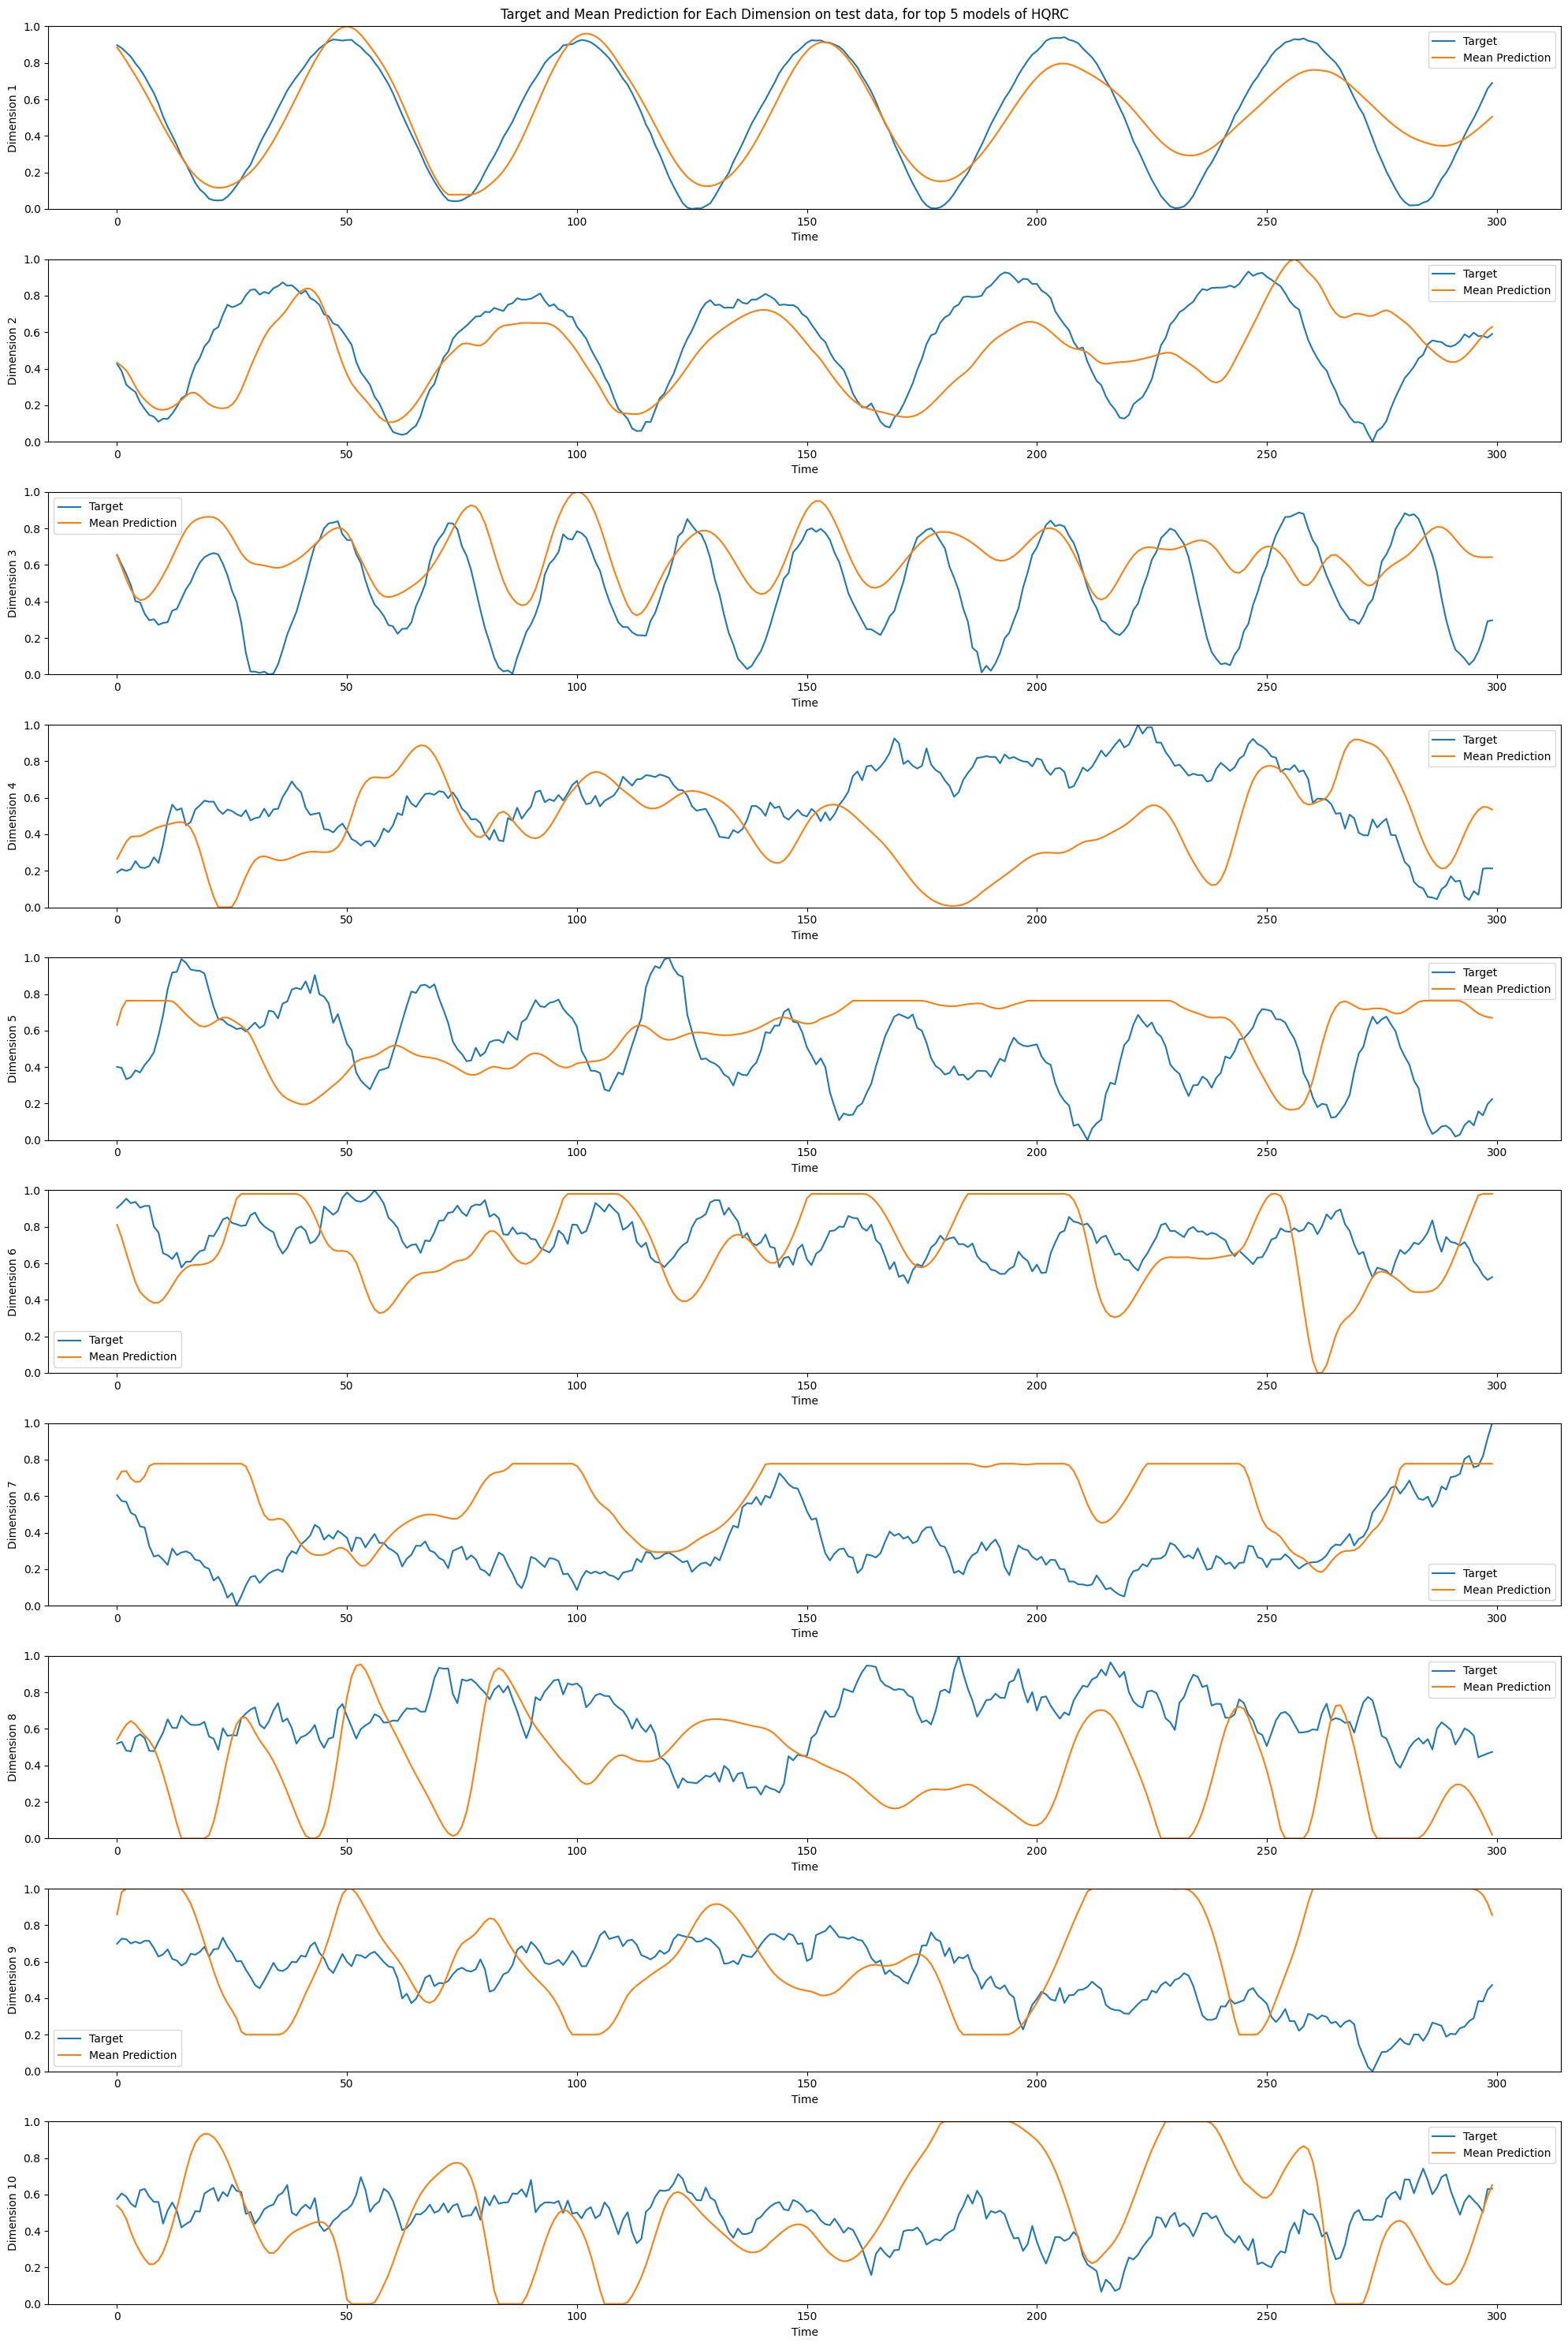

In [17]:
num_dimensions = mean_test_truths.shape[1]
# Create subplots
fig, axs = plt.subplots(num_dimensions, 1, figsize=(20, 30))

# Iterate over each dimension
for dim in range(num_dimensions):
    # Extract arrays for the current dimension
    target_dim = mean_test_truths[:, dim]
    out_dim = mean_test_predictions[:, dim]
    std_dim = std_test_predictions[:, dim]

    # Calculate min and max values across all arrays for current dimension
    data_min = min(np.min(target_dim), np.min(out_dim - std_dim))
    data_max = max(np.max(target_dim), np.max(out_dim + std_dim))

    # Normalize arrays to [0, 1] range
    target_dim = (target_dim - data_min) / (data_max - data_min)
    out_dim = (out_dim - data_min) / (data_max - data_min)
    #std_dim = std_dim / (data_max - data_min)  # std deviation is normalized accordingly

    # Plot target and output arrays
    axs[dim].plot(target_dim, label='Target')
    axs[dim].plot(out_dim, label='Mean Prediction')
    #axs[dim].fill_between(range(len(out_dim)), out_dim - std_dim, out_dim + std_dim, alpha=0.2, label=r'$\sigma$')

    # Set y-axis limits to [0, 1]
    axs[dim].set_ylim(0, 1)

    # Add labels and legend
    axs[dim].set_xlabel('Time')
    axs[dim].set_ylabel(f'Dimension {dim + 1}')
    axs[dim].legend()

# Add title
plt.suptitle('Target and Mean Prediction for Each Dimension on test data, for top 5 models of HQRC',y=0.99)
# Adjust layout
plt.tight_layout()

# Plot frequency
plt.show()

## Reconstruction of Temperature map along and error analysis

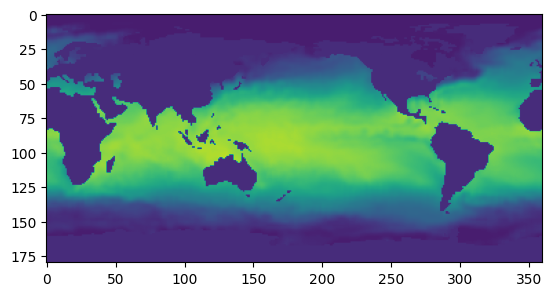

In [18]:
train_data = np.load('Data/sst_var_train',allow_pickle=True).data
test_data = np.load('Data/sst_var_test',allow_pickle=True).data
mask = np.load('Data/mask',allow_pickle=True)
#plt.imshow(train_data[0]*mask[0],vmin=-5,vmax=35)
plt.imshow(test_data[0]*mask[0],vmin=-5,vmax=35)

In [19]:
train_data_ml = train_data.reshape(427,180*360)
mask = mask[0].flatten()
mask = np.asarray(mask,dtype='bool')

train_data_ml = train_data_ml[:,mask]
train_data_ml.shape

# Find train data mean
train_data_mean = np.mean(train_data_ml,axis=0)
train_data_ml = train_data_ml - train_data_mean[None,]

In [20]:
test_data_ml = test_data.reshape(1487,180*360)
mask = np.load('Data/mask',allow_pickle=True)
mask = mask[0].flatten()
mask = np.asarray(mask,dtype='bool')

test_data_ml = test_data_ml[:,mask]
test_data_ml.shape

# Find train data mean
test_data_mean = np.mean(test_data_ml,axis=0)
test_data_ml = test_data_ml - test_data_mean[None,]

In [21]:
def field_compression(Y,K):
    '''
    Y - Snapshot matrix - shape: NxS
    K - number of modes to truncate to
    returns 
    V - truncated POD basis matrix - shape: NxK
    Ytilde - truncated coefficient matrix - shape: KxS
    '''
    V = generate_pod_bases(Y,K)
    Ytilde = field_coefficients(Y,V)

    return V, Ytilde

def generate_pod_bases(Y,K): #Mean removed
    '''
    Y - Snapshot matrix - shape: NxS
    returns V - truncated POD basis matrix - shape: NxK
    '''
    new_mat = np.matmul(np.transpose(Y),Y)
    w,v = np.linalg.eig(new_mat)

    # plt.figure()
    # plt.semilogy(w[:]/np.sum(w)*100)
    # plt.show()

    # Bases
    V = np.real(np.matmul(Y,v)) 
    trange = np.arange(np.shape(V)[1])
    V[:,trange] = V[:,trange]/np.sqrt(w[:])

    # Truncate phis
    V = V[:,0:K] # Columns are modes

    return V

def field_coefficients(Y,V):
    '''
    Y - Snapshot matrix - shape: NxS
    V - truncated POD basis matrix - shape: NxK
    returns Ytilde - shape: KxS
    '''
    return np.matmul(np.transpose(V),Y)

In [22]:
N_dim = 10

In [23]:
modes, coeffs = field_compression(train_data_ml.T,N_dim)
modes_test, coeffs_test = field_compression(test_data_ml.T,N_dim)

c:\Users\Vinamr J\Documents\qic\qrc\hqr\hqr-master\chaos\hqr2-venv\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in sqrt


In [24]:
N_train=427
with open("./Data/testing_data_N{:d}_dim{:d}.pickle".format(N_train,N_dim), "rb") as file:
    data = pickle.load(file)
    data_test = data["test_input_sequence"]
    del data
with open("./Data/training_data_N{:d}_dim{:d}.pickle".format(N_train,N_dim), "rb") as file:
    data = pickle.load(file)
    data_train = data["train_input_sequence"]
    del data

In [25]:
np.allclose(data_train[116+300-1],targets_train[samples[0]][299])
#check

True

In [26]:
print(data_train[116+300-1])
print(mean_train_truths[299])
print(mean_train_predictions[299])
#check

[321.8648    -99.581604  -48.89029    -8.7071905  -2.9636319  42.31935
  -6.394214  -17.21849    14.100046  -13.948632 ]
[321.86477661 -99.581604   -48.89028931  -8.70719147  -2.96363068
  42.3193512   -6.39421082 -17.2184906   14.10004425 -13.94863129]
[191.79709591 101.19368249  23.57618702   5.48466809  61.22395325
   1.55398871  59.59062958 -66.16629028  71.83522797  -2.40082115]


In [38]:
test_ic = [116,40,66] #taken from randomly generated test indices from the data_analysis.ipynb file
pl_max = 300
dl_max = test_ic[0]
recon_data_ml = np.matmul(modes,data_train[test_ic[0]+pl_max-1].T).T
recon_data_ml = recon_data_ml + train_data_mean[None,]
recon_data = np.copy(train_data[test_ic[0]+pl_max-1])
recon_data = recon_data.reshape(1,180*360)
recon_data[0,mask] = recon_data_ml
recon_data = recon_data.reshape(1,180,360)

pred_data_ml = np.matmul(modes,mean_train_predictions.T).T
pred_data_ml = pred_data_ml + train_data_mean[None,]
pred_data = np.copy(train_data[test_ic[0]:test_ic[0]+pl_max])
pred_data = pred_data.reshape(pl_max,180*360)
pred_data[:,mask] = pred_data_ml
pred_data = pred_data.reshape(pl_max,180,360)
new_mask = np.load('Data/mask',allow_pickle=True)
#check if correctly done

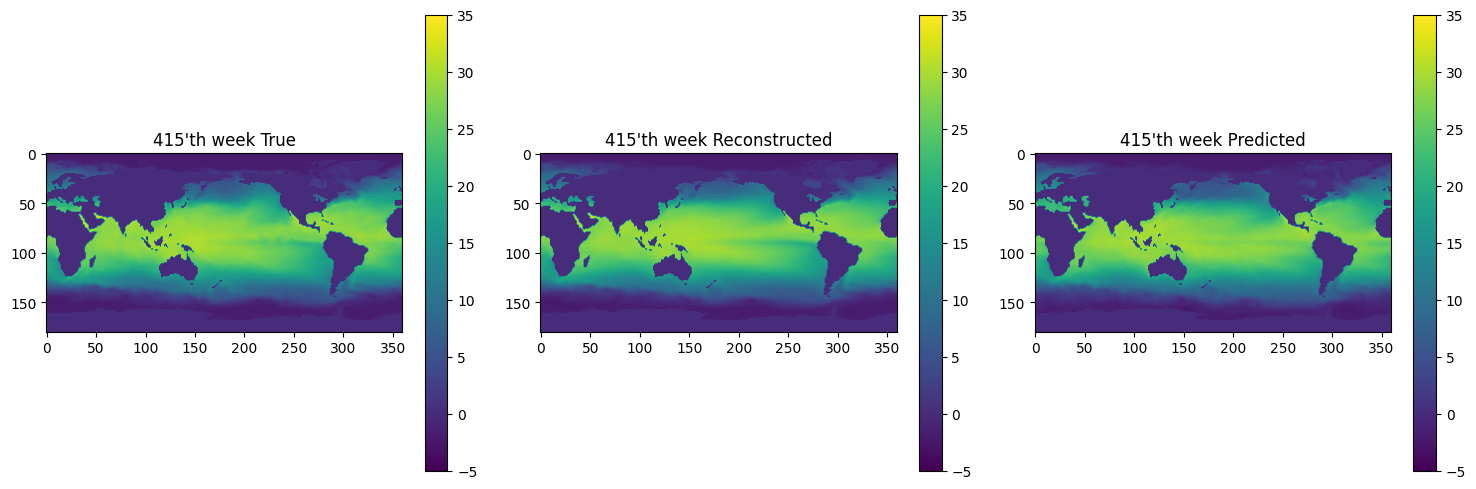

In [39]:
# Create a single figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first subplot
im1 = axs[0].imshow(train_data[dl_max+pl_max-1] * new_mask[0], vmin=-5, vmax=35)
axs[0].set_title("{}'th week True".format(dl_max+pl_max-1))
fig.colorbar(im1, ax=axs[0], orientation='vertical')


# Plot the second subplot
im2 = axs[1].imshow(recon_data[0] * new_mask[0], vmin=-5, vmax=35)
axs[1].set_title("{}'th week Reconstructed".format(dl_max+pl_max-1))
fig.colorbar(im2, ax=axs[1], orientation='vertical')

# Plot the third subplot
im3 = axs[2].imshow(pred_data[pl_max-1] * new_mask[0], vmin=-5, vmax=35)
axs[2].set_title("{}'th week Predicted".format(dl_max+pl_max-1))
fig.colorbar(im3, ax=axs[2], orientation='vertical')

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()

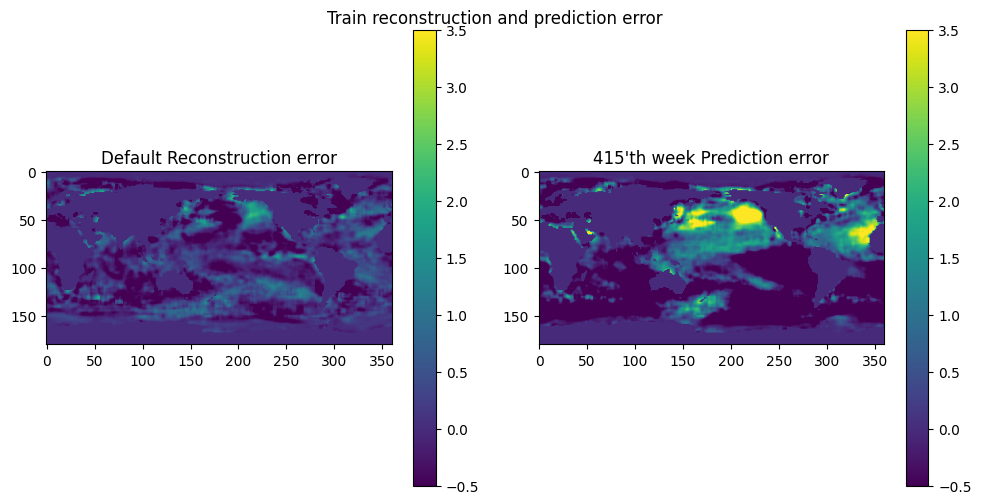

In [43]:
# Create a single figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first subplot
im1 = axs[0].imshow((train_data[dl_max+pl_max-1] - recon_data[0]) * new_mask[0], vmin=-0.5, vmax=3.5)
axs[0].set_title("Default Reconstruction error")
fig.colorbar(im1, ax=axs[0], orientation='vertical')

# Plot the second subplot
im2 = axs[1].imshow((train_data[dl_max+pl_max-1] - pred_data[pl_max-1]) * new_mask[0], vmin=-0.5, vmax=3.5)
axs[1].set_title("{}'th week Prediction error".format(dl_max+pl_max-1))
fig.colorbar(im2, ax=axs[1], orientation='vertical')

# Adjust layout
plt.tight_layout()
plt.suptitle('Train reconstruction and prediction error',y=1)
# Show the figure
plt.show()

In [44]:
temp_true = train_data[dl_max:dl_max+pl_max]
rmse_pred = np.sqrt(np.mean((temp_true-pred_data)**2))
print(rmse_pred)

1.2272663


## For East Pacific Region

In [45]:
temp_true_ep = train_data[dl_max:dl_max+pl_max,80:100,200:250]
temp_pred_ep = pred_data[:,80:100,200:250]
rmse_pred = np.sqrt(np.mean((temp_true_ep-temp_pred_ep)**2))
print(rmse_pred)

1.9800254


## For test data

In [46]:
test_ic = [116,40,66] #taken from randomly generated test indices from the data_analysis.ipynb file
pl_max = 300
dl_max = test_ic[0]
recon_data_ml = np.matmul(modes_test,data_test[test_ic[0]+pl_max-1].T).T
recon_data_ml = recon_data_ml + test_data_mean[None,]
recon_data = np.copy(test_data[test_ic[0]+pl_max-1])
recon_data = recon_data.reshape(1,180*360)
recon_data[0,mask] = recon_data_ml
recon_data = recon_data.reshape(1,180,360)

pred_data_ml = np.matmul(modes_test,mean_test_predictions.T).T
pred_data_ml = pred_data_ml + test_data_mean[None,]
pred_data = np.copy(test_data[test_ic[0]:test_ic[0]+pl_max])
pred_data = pred_data.reshape(pl_max,180*360)
pred_data[:,mask] = pred_data_ml
pred_data = pred_data.reshape(pl_max,180,360)
new_mask = np.load('Data/mask',allow_pickle=True)
#check if correctly done

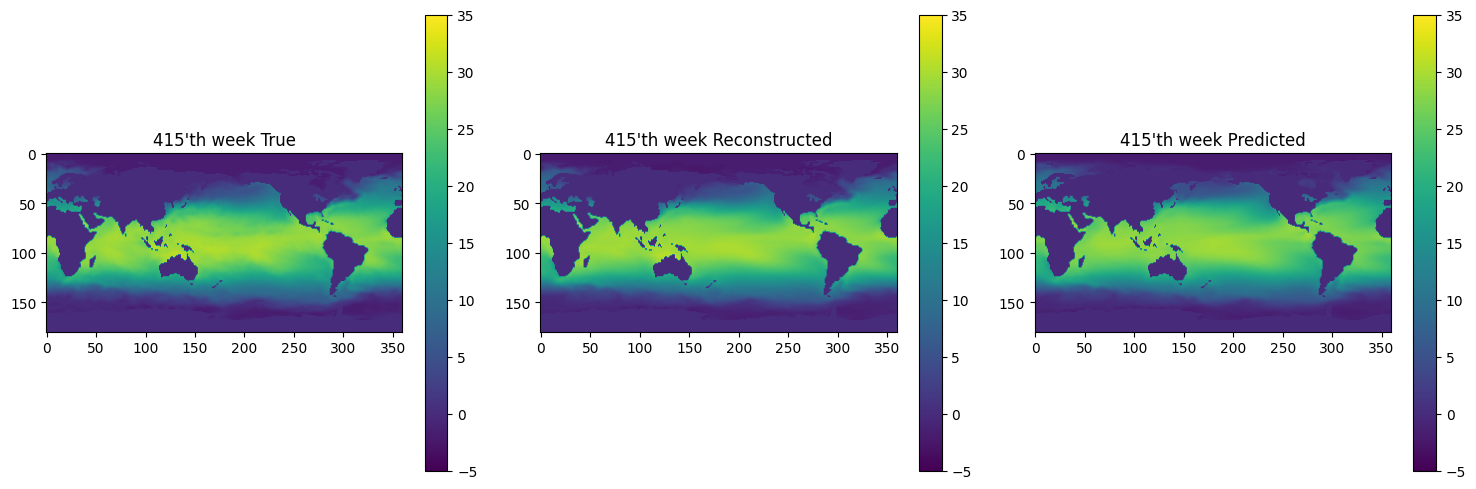

In [47]:
# Create a single figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first subplot
im1 = axs[0].imshow(test_data[dl_max+pl_max-1] * new_mask[0], vmin=-5, vmax=35)
axs[0].set_title("{}'th week True".format(dl_max+pl_max-1))
fig.colorbar(im1, ax=axs[0], orientation='vertical')


# Plot the second subplot
im2 = axs[1].imshow(recon_data[0] * new_mask[0], vmin=-5, vmax=35)
axs[1].set_title("{}'th week Reconstructed".format(dl_max+pl_max-1))
fig.colorbar(im2, ax=axs[1], orientation='vertical')

# Plot the third subplot
im3 = axs[2].imshow(pred_data[pl_max-1] * new_mask[0], vmin=-5, vmax=35)
axs[2].set_title("{}'th week Predicted".format(dl_max+pl_max-1))
fig.colorbar(im3, ax=axs[2], orientation='vertical')

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()

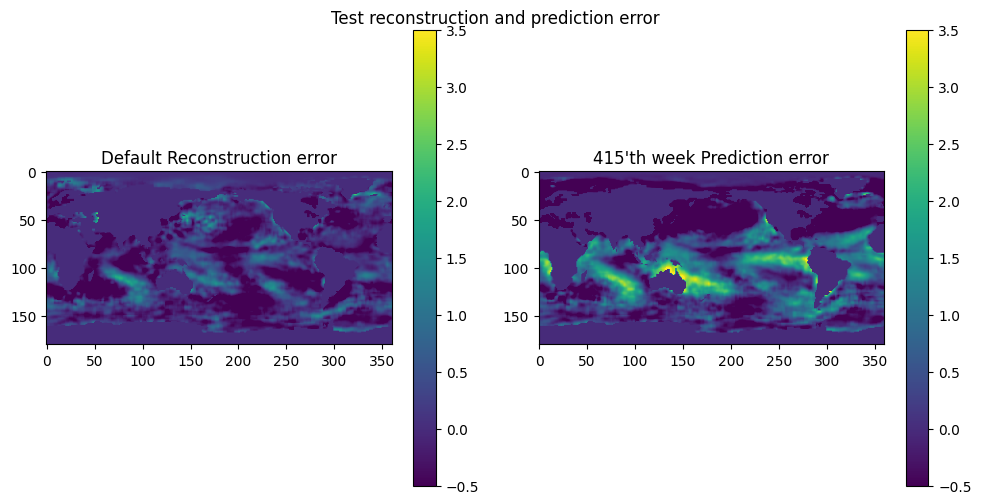

In [48]:
# Create a single figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first subplot
im1 = axs[0].imshow((test_data[dl_max+pl_max-1] - recon_data[0]) * new_mask[0], vmin=-0.5, vmax=3.5)
axs[0].set_title("Default Reconstruction error")
fig.colorbar(im1, ax=axs[0], orientation='vertical')

# Plot the second subplot
im2 = axs[1].imshow((test_data[dl_max+pl_max-1] - pred_data[pl_max-1]) * new_mask[0], vmin=-0.5, vmax=3.5)
axs[1].set_title("{}'th week Prediction error".format(dl_max+pl_max-1))
fig.colorbar(im2, ax=axs[1], orientation='vertical')

# Adjust layout
plt.tight_layout()
plt.suptitle('Test reconstruction and prediction error',y=1)
# Show the figure
plt.show()

In [35]:
temp_true = test_data[dl_max:dl_max+pl_max]
rmse_pred = np.sqrt(np.mean((temp_true-pred_data)**2))
print(rmse_pred)

0.98425657


## For East Pacific Region

In [36]:
temp_true_ep = test_data[dl_max:dl_max+pl_max,80:100,200:250]
temp_pred_ep = pred_data[:,80:100,200:250]
rmse_pred = np.sqrt(np.mean((temp_true_ep-temp_pred_ep)**2))
print(rmse_pred)

1.5753262


## Memory and computation time analysis

In [40]:
models = []
samples = []
V_values = [5,10,15,20]
alpha_values = [0.3,0.4,0.5,0.6,0.7,0.8,0.9]
beta_values = [1e-3,1e-4,1e-5,1e-6,1e-7]
for V in V_values:
    for alpha in alpha_values:
        for beta in beta_values:
            string1 = f"hqrc_pinv-RDIM_5-N_used_427-DL_40-Nqr_5-A_{alpha}-J_2.0-fJ_1-V_{V}-NL_0-IPL_300-IUL_0-REG_{beta}-AU_0-NICS_3"
            string2 = f"HQRC-V={V}-alpha={alpha}-beta={beta}"
            models.append([os.path.join(model_path,string1),string2])
            samples.append(string2)
title = "Sea Surface Temperatures"

In [209]:
train_time_dict = dict()
memory_dict = dict()
trainable_parameters_dict = dict()
for i in range(len(models)):
    rfolder, label = models[i][0], models[i][1]
    fname = os.path.join(rfolder, 'data.pickle')
    if os.path.isfile(fname):
        with open(fname, 'rb') as rfile:
            try:
                rs = pickle.load(rfile)
            except:
                continue
            #print(rs.keys())
            train_time_dict[label]=rs["total_training_time"]
            trainable_parameters_dict[label]=rs["n_trainable_parameters"]
            memory_dict[label]=rs["memory"]
    else:
        print('Not found {}'.format(fname))

In [210]:
train_time_dict

{'HQRC-V=5-alpha=0.3-beta=0.001': 8.859001874923706,
 'HQRC-V=5-alpha=0.3-beta=0.0001': 7.854891538619995,
 'HQRC-V=5-alpha=0.3-beta=1e-05': 9.677555322647095,
 'HQRC-V=5-alpha=0.3-beta=1e-06': 7.392664909362793,
 'HQRC-V=5-alpha=0.3-beta=1e-07': 7.783140659332275,
 'HQRC-V=5-alpha=0.4-beta=0.001': 7.482452392578125,
 'HQRC-V=5-alpha=0.4-beta=0.0001': 7.500629186630249,
 'HQRC-V=5-alpha=0.4-beta=1e-05': 7.578429698944092,
 'HQRC-V=5-alpha=0.4-beta=1e-06': 8.908912658691406,
 'HQRC-V=5-alpha=0.4-beta=1e-07': 9.338178873062134,
 'HQRC-V=5-alpha=0.5-beta=0.001': 9.450072288513184,
 'HQRC-V=5-alpha=0.5-beta=0.0001': 9.405933618545532,
 'HQRC-V=5-alpha=0.5-beta=1e-05': 9.346447229385376,
 'HQRC-V=5-alpha=0.5-beta=1e-06': 9.318443059921265,
 'HQRC-V=5-alpha=0.5-beta=1e-07': 9.377601385116577,
 'HQRC-V=5-alpha=0.6-beta=0.001': 9.581291437149048,
 'HQRC-V=5-alpha=0.6-beta=0.0001': 9.815933465957642,
 'HQRC-V=5-alpha=0.6-beta=1e-05': 8.794764280319214,
 'HQRC-V=5-alpha=0.6-beta=1e-06': 22.40113

In [211]:
memory_dict

{'HQRC-V=5-alpha=0.3-beta=0.001': 102.66015625,
 'HQRC-V=5-alpha=0.3-beta=0.0001': 102.265625,
 'HQRC-V=5-alpha=0.3-beta=1e-05': 102.78515625,
 'HQRC-V=5-alpha=0.3-beta=1e-06': 102.65625,
 'HQRC-V=5-alpha=0.3-beta=1e-07': 102.69140625,
 'HQRC-V=5-alpha=0.4-beta=0.001': 102.70703125,
 'HQRC-V=5-alpha=0.4-beta=0.0001': 102.8984375,
 'HQRC-V=5-alpha=0.4-beta=1e-05': 102.5703125,
 'HQRC-V=5-alpha=0.4-beta=1e-06': 102.41015625,
 'HQRC-V=5-alpha=0.4-beta=1e-07': 102.7734375,
 'HQRC-V=5-alpha=0.5-beta=0.001': 102.56640625,
 'HQRC-V=5-alpha=0.5-beta=0.0001': 102.83203125,
 'HQRC-V=5-alpha=0.5-beta=1e-05': 102.9296875,
 'HQRC-V=5-alpha=0.5-beta=1e-06': 102.70703125,
 'HQRC-V=5-alpha=0.5-beta=1e-07': 102.671875,
 'HQRC-V=5-alpha=0.6-beta=0.001': 102.453125,
 'HQRC-V=5-alpha=0.6-beta=0.0001': 102.46875,
 'HQRC-V=5-alpha=0.6-beta=1e-05': 102.8828125,
 'HQRC-V=5-alpha=0.6-beta=1e-06': 102.59375,
 'HQRC-V=5-alpha=0.6-beta=1e-07': 102.65625,
 'HQRC-V=5-alpha=0.7-beta=0.001': 102.36328125,
 'HQRC-V=5-

In [212]:
trainable_parameters_dict

{'HQRC-V=5-alpha=0.3-beta=0.001': 755,
 'HQRC-V=5-alpha=0.3-beta=0.0001': 755,
 'HQRC-V=5-alpha=0.3-beta=1e-05': 755,
 'HQRC-V=5-alpha=0.3-beta=1e-06': 755,
 'HQRC-V=5-alpha=0.3-beta=1e-07': 755,
 'HQRC-V=5-alpha=0.4-beta=0.001': 755,
 'HQRC-V=5-alpha=0.4-beta=0.0001': 755,
 'HQRC-V=5-alpha=0.4-beta=1e-05': 755,
 'HQRC-V=5-alpha=0.4-beta=1e-06': 755,
 'HQRC-V=5-alpha=0.4-beta=1e-07': 755,
 'HQRC-V=5-alpha=0.5-beta=0.001': 755,
 'HQRC-V=5-alpha=0.5-beta=0.0001': 755,
 'HQRC-V=5-alpha=0.5-beta=1e-05': 755,
 'HQRC-V=5-alpha=0.5-beta=1e-06': 755,
 'HQRC-V=5-alpha=0.5-beta=1e-07': 755,
 'HQRC-V=5-alpha=0.6-beta=0.001': 755,
 'HQRC-V=5-alpha=0.6-beta=0.0001': 755,
 'HQRC-V=5-alpha=0.6-beta=1e-05': 755,
 'HQRC-V=5-alpha=0.6-beta=1e-06': 755,
 'HQRC-V=5-alpha=0.6-beta=1e-07': 755,
 'HQRC-V=5-alpha=0.7-beta=0.001': 755,
 'HQRC-V=5-alpha=0.7-beta=0.0001': 755,
 'HQRC-V=5-alpha=0.7-beta=1e-05': 755,
 'HQRC-V=5-alpha=0.7-beta=1e-06': 755,
 'HQRC-V=5-alpha=0.7-beta=1e-07': 755,
 'HQRC-V=5-alpha=0.8